# TP6

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Mesure de mouvement par construction d’une référence

### Question 1

Text(0.5, 1.0, 'Accumulation image')

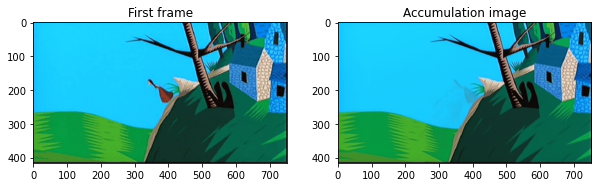

In [61]:
movie = cv2.VideoCapture('Films/film_anim.avi')

ret, frame = movie.read() 
count = 1
img_ref = frame.astype(np.float32)
img_first = frame

while ret is True:
    ret, frame = movie.read() 
    
    if ret == True:
        count += 1
        img_ref += frame.astype(np.float32)
    
movie.release()
    
img_ref /= count
img_ref = img_ref.astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_first, cv2.COLOR_BGR2RGB))
plt.title('First frame')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_ref, cv2.COLOR_BGR2RGB))
plt.title('Accumulation image')

### Question 2

In [62]:
movie = cv2.VideoCapture('Films/film_anim.avi')

ref_gray = cv2.cvtColor(img_ref, cv2.COLOR_BGR2GRAY).astype(np.float32)

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        
        # Compute image difference
        detected_motion = np.abs(ref_gray - frame_gray).astype(np.uint8)
        
        # Apply thresholding to binarize detected motion
        ret2, detected_motion_thresholded = cv2.threshold(detected_motion, 50, 255, cv2.THRESH_BINARY) 
        detected_motion_thresholded = cv2.cvtColor(detected_motion_thresholded, 1)
        
        output_img = np.concatenate((frame, detected_motion_thresholded), axis=1)
        cv2.imshow('Windows', output_img)
        cv2.waitKey(200) 

movie.release()
cv2.destroyAllWindows()

### Question 3

In [64]:
movie = cv2.VideoCapture('Films/film_anim.avi')

ref_gray = cv2.cvtColor(img_ref, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Create a morphological operator
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        
        # Compute image difference
        detected_motion = np.abs(ref_gray - frame_gray).astype(np.uint8)
        
        # Apply thresholding to binarize detected motion
        ret2, detected_motion_thresholded = cv2.threshold(detected_motion, 50, 255, cv2.THRESH_BINARY) 
        
        # Apply morph operator (opening)
        detection_motion_filtered = cv2.morphologyEx(detected_motion_thresholded, cv2.MORPH_OPEN, kernel) 
        detection_motion_filtered = cv2.cvtColor(detection_motion_filtered, 1)
        
        output_img = np.concatenate((frame, detection_motion_filtered), axis=1)
        cv2.imshow('Windows', output_img)
        cv2.waitKey(200)

movie.release()
cv2.destroyAllWindows()

### Question 4

In [66]:
movie = cv2.VideoCapture('Films/film_anim.avi')

ref_gray = cv2.cvtColor(img_ref, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Create a morphological operator
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

# Rectangle parameters
color = (255, 0, 0)
thickness = 2

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        
        # Compute image difference
        detected_motion = np.abs(ref_gray - frame_gray).astype(np.uint8)
        
        # Apply thresholding to binarize detected motion
        ret2, detected_motion_thresholded = cv2.threshold(detected_motion, 50, 255, cv2.THRESH_BINARY) 
        
        # Apply morph operator (opening)
        detection_motion_filtered = cv2.morphologyEx(detected_motion_thresholded, cv2.MORPH_OPEN, kernel) 
        detection_motion_filtered = cv2.cvtColor(detection_motion_filtered, 1)
        
        # Apply rectangle
        proj_x = np.where(detection_motion_filtered.sum(axis=0) > 0)[0]
        proj_y = np.where(detection_motion_filtered.sum(axis=1) > 0)[0]
        if len(proj_x) == 0 or len(proj_y) == 0:
            x0, x1, y0, y1 = 0, 0, 0, 0
        else:
            x0, x1, y0, y1 = proj_x[0], proj_x[-1], proj_y[0], proj_y[-1]
            
        start_point, end_point = (x0, y0), (x1, y1)
        # print("Start point : " + str(start_point) + " / End point : " + str(end_point))
        detection_motion_rect = cv2.rectangle(detection_motion_filtered, start_point, end_point, color, thickness)
        
        output_img = np.concatenate((frame, detection_motion_rect), axis=1)
        cv2.imshow('Windows', output_img)
        cv2.waitKey(200)

movie.release()
cv2.destroyAllWindows()

### Question 5

### Détection de transition dans des séquence d’images

### Question 6

In [6]:
movie = cv2.VideoCapture('Films/extrait_plans1.avi')

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        cv2.imshow('Windows', frame)
        cv2.waitKey(40) 

movie.release()
cv2.destroyAllWindows()

### Question 7

[ 12  44  72  94 121 148 196 220 246]


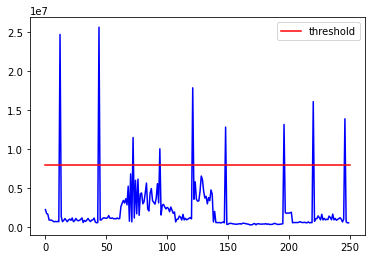

In [71]:
movie = cv2.VideoCapture('Films/extrait_plans1.avi')

ret, prev = movie.read()
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY).astype(np.float32)

frame_errors = []

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        frame_diff = np.abs(prev_gray - frame_gray).sum(axis=(0, 1))
        frame_errors.append(frame_diff)
    
    prev_gray = frame_gray
        
movie.release()

threshold = 0.8 * 1e7
print(np.where(np.array(frame_errors) > threshold)[0])
plt.plot(frame_errors, 'b')
plt.plot([0, len(frame_errors)], [threshold, threshold], 'r', label='threshold')
plt.legend()

### Question 8

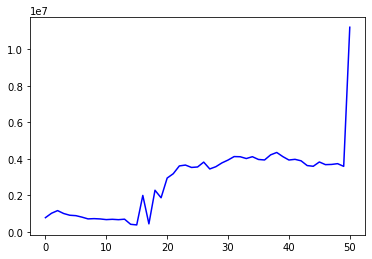

In [72]:
movie = cv2.VideoCapture('Films/extrait_plans2.avi')

ret, prev = movie.read()
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY).astype(np.float32)

frame_errors = []

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        frame_diff = np.abs(prev_gray - frame_gray).sum(axis=(0, 1))
        frame_errors.append(frame_diff)
    
    prev_gray = frame_gray
        
movie.release()

plt.plot(frame_errors, 'b')

### Mesure de mouvement dans une séquence avec caméra mobile

### Question 9

In [9]:
movie = cv2.VideoCapture('Films/longueur2.avi')

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        cv2.imshow('Windows', frame)
        cv2.waitKey(40) 

movie.release()
cv2.destroyAllWindows()

### Question 10

Text(0.5, 1.0, 'Accumulation image')

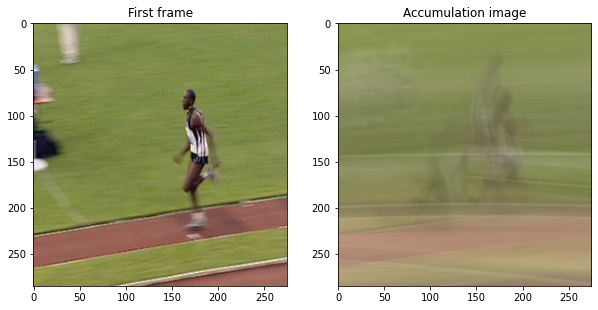

In [10]:
movie = cv2.VideoCapture('Films/longueur2.avi')

ret, frame = movie.read() 
count = 1
img_ref = frame.astype(np.float32)
img_first = frame

while ret is True:
    ret, frame = movie.read() 
    
    if ret == True:
        count += 1
        img_ref += frame.astype(np.float32)
    
movie.release()
    
img_ref /= count
img_ref = img_ref.astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_first, cv2.COLOR_BGR2RGB))
plt.title('First frame')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_ref, cv2.COLOR_BGR2RGB))
plt.title('Accumulation image')

### Question 11

In [96]:
# Mouse callback function
def draw_rectangle(event, x, y, flags, param):
    global start_point, end_point
    
    color = (0, 0, 255)
    thickness = 1
    
    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y) # Top-left corner
    elif event == cv2.EVENT_LBUTTONUP:
        end_point = (x, y) # Bottom-right corner
        cv2.rectangle(frame, start_point, end_point, color, thickness)

(158, 65)
(183, 91)


Text(0.5, 1.0, 'Patch')

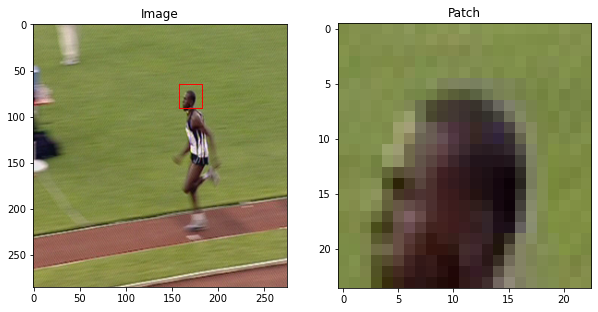

In [97]:
movie = cv2.VideoCapture('Films/longueur2.avi')

ret, frame = movie.read()

cv2.namedWindow("Window")
cv2.setMouseCallback("Window", draw_rectangle)

while(1):
    cv2.imshow("Window", frame)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

print(start_point)
print(end_point)

patch = frame[start_point[1]+thickness:end_point[1]-thickness, start_point[0]+thickness:end_point[0]-thickness, :]

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
plt.title('Patch')

### Question 12

In [98]:
def corr(img, patch):
    patch_centered = patch - np.mean(patch)
    patch_std = np.sum(patch_centered**2)
    
    img_centered = img - np.mean(img)
    img_std = np.sum(img**2)
    
    coeff_corr = (np.sum(img_centered * patch_centered)) / np.sqrt(img_std * patch_std)
    
    return coeff_corr

def crop(img, x0, y0, Tx, Ty):
    return img[y0 : y0 + Ty, x0 : x0 + Tx]

def corr2(img, patch):
    img_corr = np.zeros(img.shape)
    Ty, Tx = patch.shape[0], patch.shape[1]
    corr_max = 0
    x_opt, y_opt = 0, 0
    
    for y in range(img.shape[0] - Ty):
        for x in range(img.shape[1] - Tx):
            sub_img = crop(img, x, y, Tx, Ty)
            coeff_corr = corr(sub_img, patch)
            img_corr[y, x] = coeff_corr
            
            if coeff_corr > corr_max:
                corr_max = coeff_corr
                x_opt = x
                y_opt = y
                
    return corr_max, x_opt, y_opt, img_corr

Coefficient correlation max : 0.3691453
x of max coefficient : 159
y of max coefficient : 66


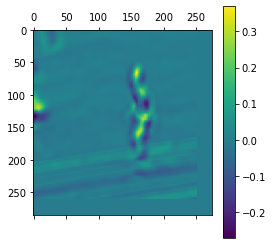

In [99]:
movie = cv2.VideoCapture('Films/longueur2.avi')

ret, frame = movie.read()

frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
patch_gray = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY).astype(np.float32)

corr_max, x_opt, y_opt, img_corr = corr2(frame_gray, patch_gray)

print("Coefficient correlation max : " + str(corr_max))
print("x of max coefficient : " + str(x_opt))
print("y of max coefficient : " + str(y_opt))

plt.matshow(img_corr) # /!\ L'image est décalée de Tx et Ty
plt.colorbar()

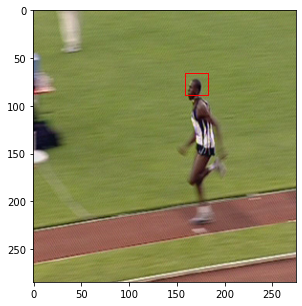

In [100]:
movie = cv2.VideoCapture('Films/longueur2.avi')

ret, frame = movie.read()

Tx, Ty = patch.shape[0], patch.shape[1]
start_point = (x_opt, y_opt)
end_point = (x_opt + Tx, y_opt + Ty)
color = (0, 0, 255)
thickness = 1

plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(cv2.rectangle(frame, start_point, end_point, color, thickness), cv2.COLOR_BGR2RGB))

In [58]:
movie = cv2.VideoCapture('Films/longueur2.avi')

color = (0, 0, 255)
thickness = 1

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        corr_max, x_opt, y_opt, _ = corr2(frame_gray, patch_gray)
        
        start_point = (x_opt, y_opt)
        end_point = (x_opt + Tx, y_opt + Ty)
        
        cv2.rectangle(frame, start_point, end_point, color, thickness)
        
        cv2.imshow('Windows', frame)
        cv2.waitKey(40) 
        
movie.release()
cv2.destroyAllWindows()

In [116]:
def corr2opt(img, patch, x_opt, y_opt):
    img_corr = np.zeros(img.shape)
    Ty, Tx = patch.shape[0], patch.shape[1]
    corr_max = 0
    x_deb, y_deb = x_opt - Tx, y_opt - Ty
    
    if (x_deb < 0) or (y_deb < 0) or (x_deb + 2 * Tx >= img.shape[1]) or (y_deb + 2 * Ty >= img.shape[0]):
        return corr2(img, patch)
    
    for y in range(y_deb, y_deb + 2 * Ty):
        for x in range(x_deb, x_deb + 2 * Tx):
            sub_img = crop(img, x, y, Tx, Ty)
            coeff_corr = corr(sub_img, patch)
            img_corr[y, x] = coeff_corr
            
            if coeff_corr > corr_max:
                corr_max = coeff_corr
                x_opt = x
                y_opt = y
                
    return corr_max, x_opt, y_opt, img_corr

In [117]:
movie = cv2.VideoCapture('Films/longueur2.avi')

color = (0, 0, 255)
thickness = 2

# Find first x_opt and y_opt
ret, frame = movie.read()

frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
_, x_opt, y_opt, _ = corr2(frame_gray, patch_gray)

while movie.isOpened():
    ret, frame = movie.read()
    
    if not ret:
        break
    else:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        _, x_opt, y_opt, _ = corr2opt(frame_gray, patch_gray, x_opt, y_opt)
        
        start_point = (x_opt, y_opt)
        end_point = (x_opt + Tx, y_opt + Ty)
        
        cv2.rectangle(frame, start_point, end_point, color, thickness)
        
        cv2.imshow('Windows', frame)
        cv2.waitKey(40) 
        
movie.release()
cv2.destroyAllWindows()

ValueError: operands could not be broadcast together with shapes (24,22) (24,23) 

In [118]:
cv2.destroyAllWindows()